# <font color="orange">XGBoost (X Gradient boosting)</font>

[https://www.turing.com/kb/understanding-and-implementing-xgboost-in-data-science] <br>
[https://medium.com/sfu-cspmp/xgboost-a-deep-dive-into-boosting-f06c9c41349]

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [33]:
RNST = 1373
DF = pd.read_csv('../../datasets/Automobile.csv',low_memory=False,
                 usecols=[
                     'bore','fuel_type','number_of_doors','body_style','engine_location','engine_type','engine_size',
                     'fuel_system','bore','horsepower','peak_rpm','city_mpg','highway_mpg',
                     'compression_ratio','stroke','price'
                 ])

In [4]:
def OHC_transformer_single_column(DF,column_name,merged = False):
    label_encoder = LabelEncoder()
    encoded = label_encoder.fit_transform(DF[column_name])
    labels =pd.Series(label_encoder.classes_)
    
    clmt = ColumnTransformer([(column_name,OneHotEncoder(),[0])], remainder='passthrough')
    clmt_fited_data = clmt.fit_transform(DF[[column_name]]) 
    clmt_fited_data = clmt_fited_data if type(clmt_fited_data)== np.ndarray else clmt_fited_data.toarray()  
    NDF = pd.DataFrame(clmt_fited_data,columns=[f'{column_name}_{x}' for x in labels])
    
    if merged is True :
        merged = DF.merge(NDF, left_index=True,right_index=True)
        return merged.drop(columns=[column_name])
    else: 
        return NDF

In [34]:
PPDF = OHC_transformer_single_column(DF,'fuel_type',merged=True)
PPDF = OHC_transformer_single_column(PPDF,'number_of_doors',merged=True)
PPDF = OHC_transformer_single_column(PPDF,'body_style',merged=True)
PPDF = OHC_transformer_single_column(PPDF,'engine_location',merged=True)
PPDF = OHC_transformer_single_column(PPDF,'engine_type',merged=True)
PPDF = OHC_transformer_single_column(PPDF,'fuel_system',merged=True)

In [35]:
nnc = ['engine_size','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg']

In [36]:
normalizer = MinMaxScaler()
PPDF[nnc] = normalizer.fit_transform(PPDF[nnc])

In [37]:
X = PPDF[PPDF.columns.difference(['price'])]
Y = PPDF['price']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=RNST)

In [38]:
XGboostR = GradientBoostingRegressor(
            loss='absolute_error',
            learning_rate=.297,
            subsample=0.4,
            min_samples_split=16,
            random_state=RNST
            )
XGboostR.fit(X_train,Y_train)
Y_predict = XGboostR.predict(X_test)
XGboostR.score(X_test,Y_test)

0.9319256631037273

In [205]:
mean_absolute_error(Y_test,Y_predict)

1724.076147467966

# XGBoost
[XGBoost] [https://xgboost.readthedocs.io/en/stable/get_started.html]

In [338]:
import xgboost as xgb
import matplotlib.pyplot as PLT

In [211]:
data_matrix = xgb.DMatrix(data=X_train,label=Y_train)

In [345]:
xgb_reg = xgb.XGBRFRegressor(colsample_bytree=.4,max_depth=1000,n_estimators=1000)
xgb_reg.fit(X_train,Y_train)
Y_predict = xgb_reg.predict(X_test)
xgb_reg.score(X_test,Y_test)

/opt/conda/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


0.9200899346609756

In [346]:
mean_absolute_error(Y_test,Y_predict)

1719.5508482689952

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

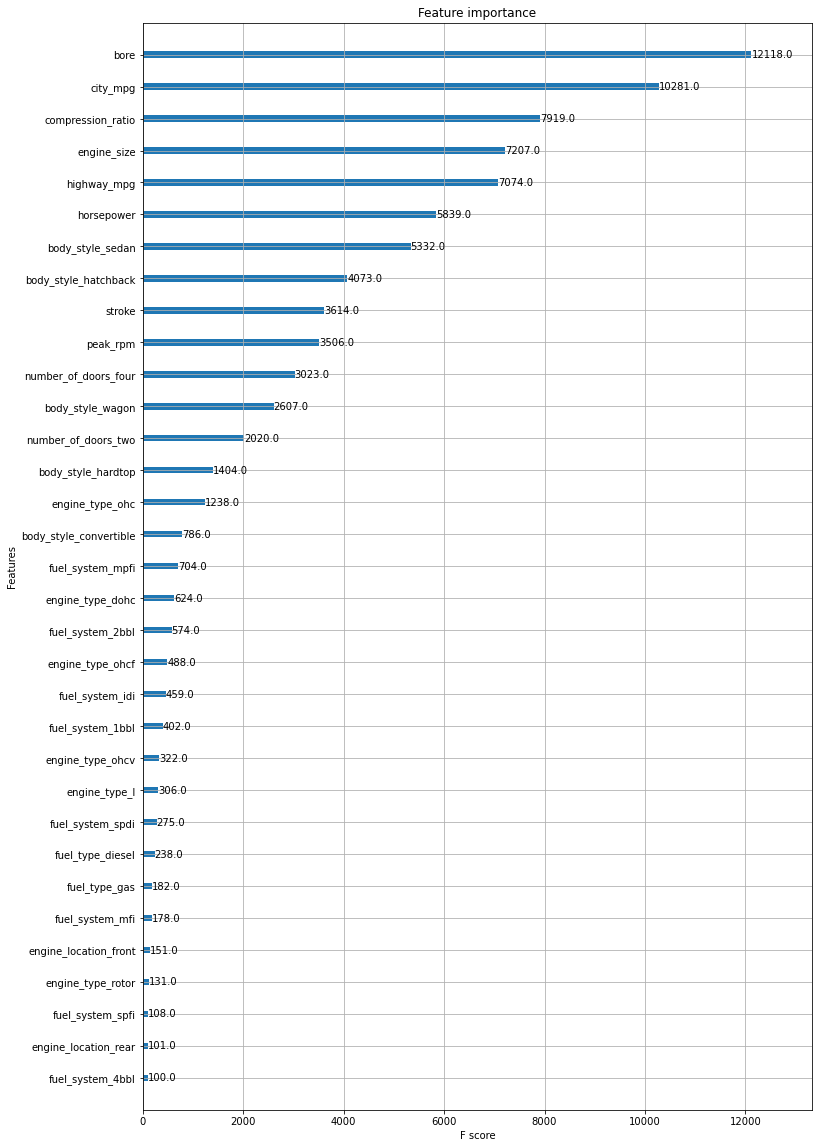

In [342]:
fig, ax = PLT.subplots(figsize=(12, 20))
xgb.plot_importance(xgb_reg,ax=ax)